In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#import countries dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

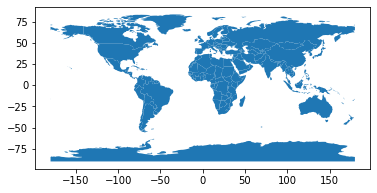

In [4]:
#plot whole world
world.plot()

/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

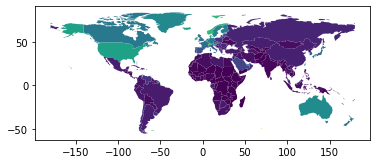

In [5]:
#from gdp and population size, calculate GDP per capita
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

In [6]:
#import capital cities dataset
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

<AxesSubplot:>

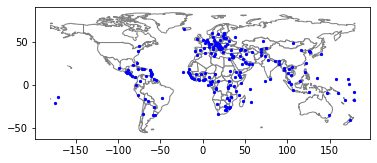

In [19]:
# plot multiple layers on a map - country outlines and capital cities
fig, ax = plt.subplots()

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='grey')
cities.plot(ax=ax, marker='o', color='blue', markersize=5)

In [10]:
#define a dictionary of countries I have been to and number of times I have visited
country_visits = {'France' : 10, 'Germany' : 3, 'Netherlands' : 1, 'Ireland' : 1, 'Spain' : 3, 'Switzerland' : 1, 'Italy' : 3, 'Australia' : 1, 'New Zealand' : 1, 'Singapore' : 1, 'Thailand' : 1, 'Laos' : 1, 'Fiji' : 1, 'United States of America' : 4 }

In [11]:
#create a column based on the dictionary
world['visits'] = world['name'].map(country_visits)

/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [12]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap,visits
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.006176,1.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.001089,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001504,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046195,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.065298,4.0
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.007412,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.008908,NaN
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.004417,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.017397,NaN


<AxesSubplot:>

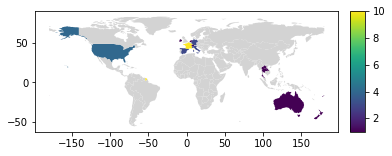

In [17]:
#plot visits data with scale bar
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure()
ax = plt.axes()

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(
    column="visits",
    legend=True,
    ax=ax,
    cax=cax,
    missing_kwds={
        "color": "lightgrey",
    },
)